<a href="https://colab.research.google.com/github/karncita/Amigo-secreto-/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 5. Evaluación de TIENDAS

     Tienda            Total
0  tienda_1 1,150,880,400.00
1  tienda_2 1,116,343,500.00
2  tienda_3 1,098,019,600.00
3  tienda_4 1,038,375,700.00
La Tienda 1 es la que mas factura


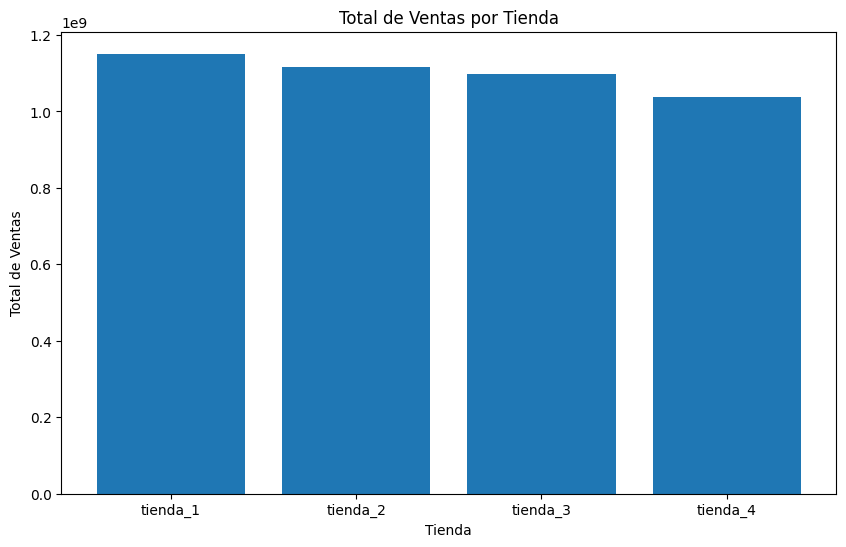

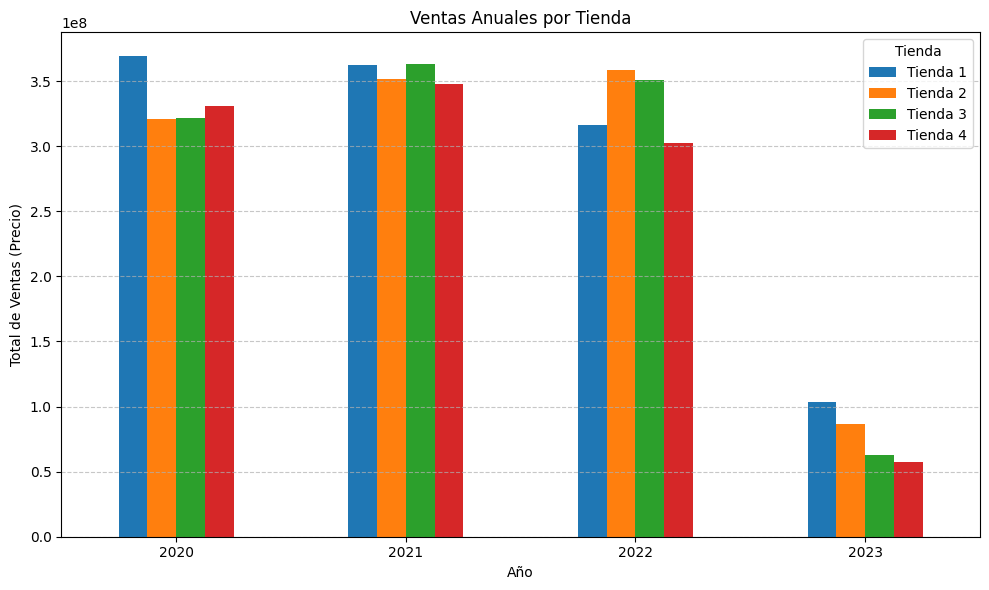

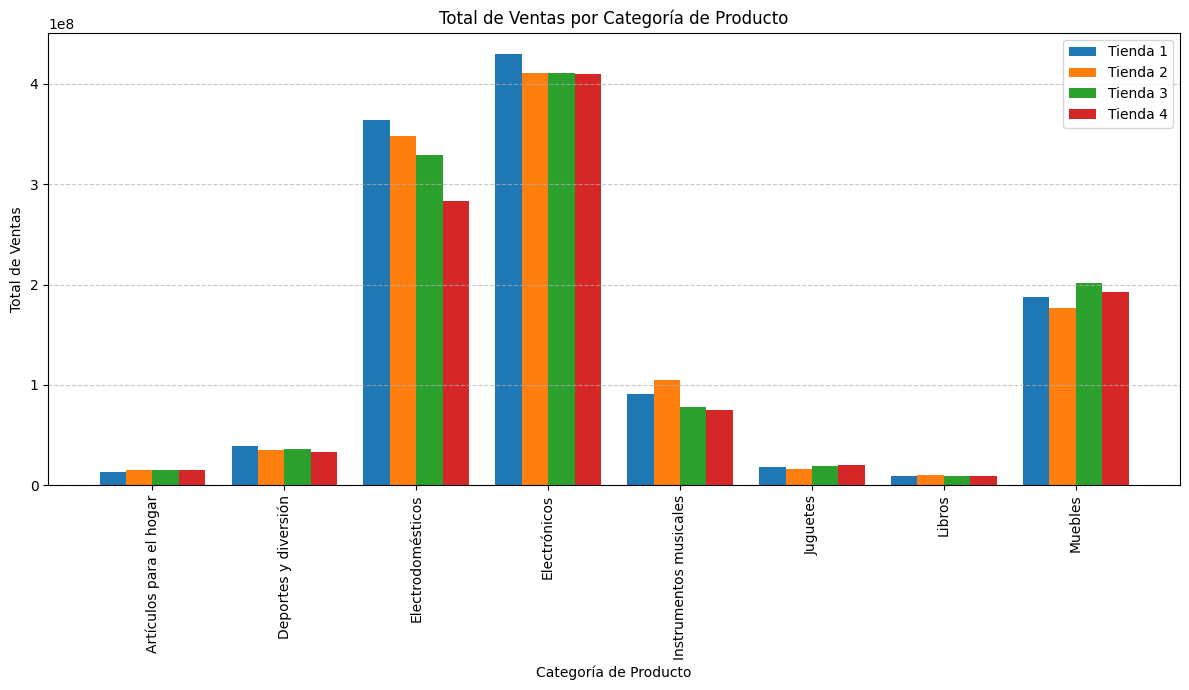

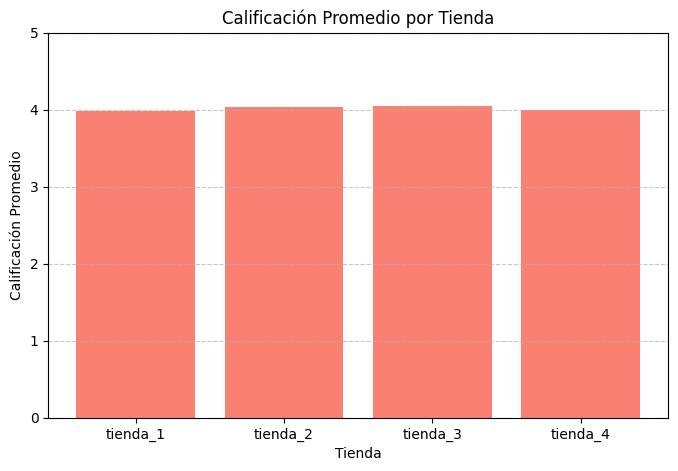

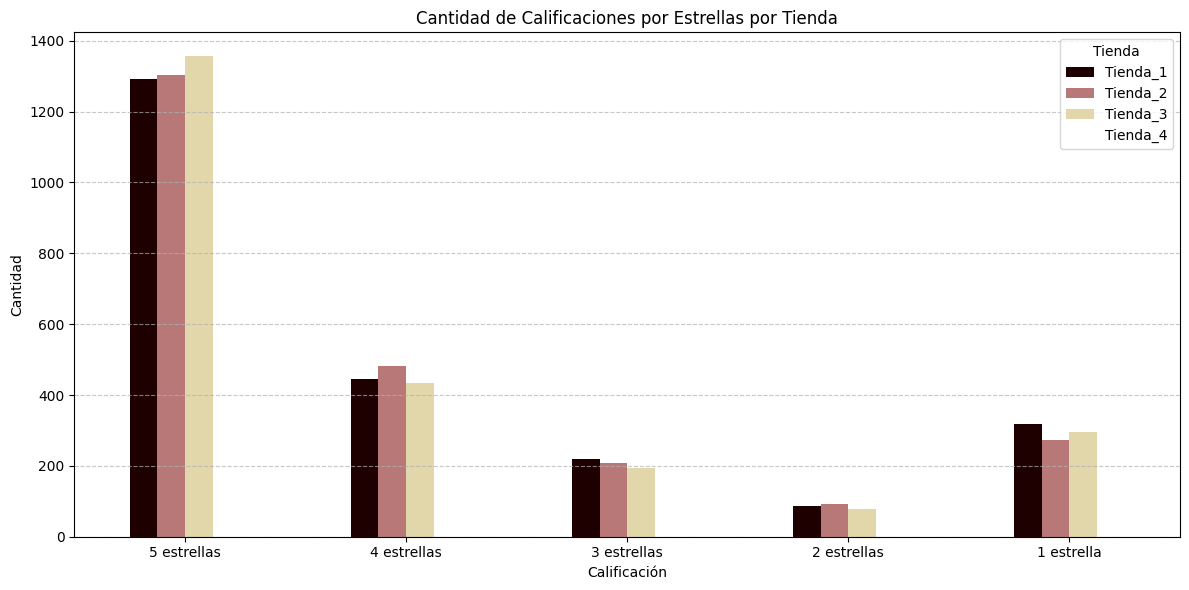

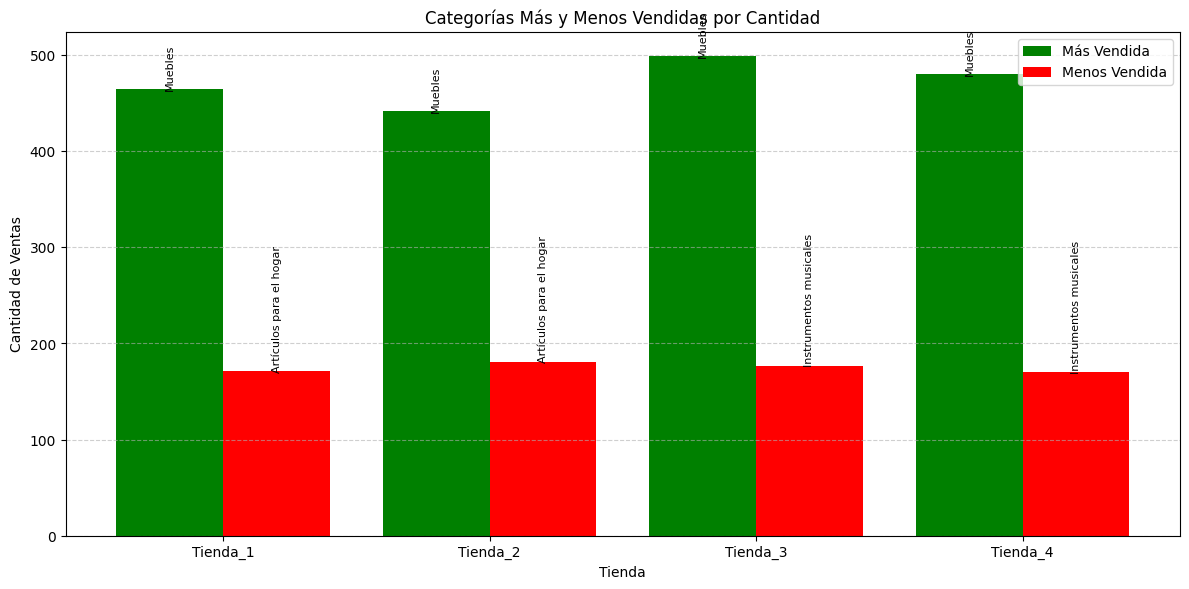

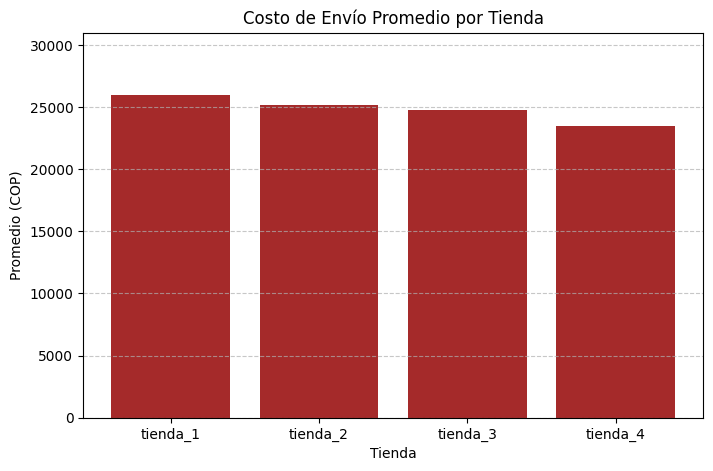

     Tienda  Puntaje Total
0  Tienda_2           0.73
1  Tienda_3           0.69
2  Tienda_1           0.40
3  Tienda_4           0.27

La tienda recomendada para cerrar es: **Tienda_4**, por bajas ventas


In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Origen datos de Juan

archivos = url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

totales = {
    'tienda_1': tienda['Precio'].sum(),
    'tienda_2': tienda2['Precio'].sum(),
    'tienda_3': tienda3['Precio'].sum(),
    'tienda_4': tienda4['Precio'].sum()
}

pd.options.display.float_format = '{:,.2f}'.format
df_totales = pd.DataFrame(list(totales.items()), columns=['Tienda', 'Total'])



#Grafico de ventas por tiendas

plt.figure(figsize=(10, 6))
plt.bar(df_totales['Tienda'], df_totales['Total'])
plt.xlabel('Tienda')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Tienda')

print(df_totales)
print('La Tienda 1 es la que mas factura')


#Fecha de ventas

for df in (tienda, tienda2, tienda3, tienda4):
    df ["Fecha de Compra"] = pd.to_datetime(df["Fecha de Compra"], dayfirst=True)
    df["Año"] = df["Fecha de Compra"].dt.year

ventas_anuales = (
    pd.concat([
        tienda.assign(Tienda="Tienda 1"),
        tienda2.assign(Tienda="Tienda 2"),
        tienda3.assign(Tienda="Tienda 3"),
        tienda4.assign(Tienda="Tienda 4")
    ])
    .groupby(["Año", "Tienda"])["Precio"]
    .sum()
    .reset_index()
)
pivot_anual = ventas_anuales.pivot(index='Año', columns='Tienda', values='Precio')
pivot_anual.plot(
    kind="bar",
    figsize=(10, 6),
    stacked=False
)
plt.title("Ventas Anuales por Tienda")
plt.xlabel("Año")
plt.ylabel("Total de Ventas (Precio)")
plt.xticks(rotation=0)
plt.legend(title="Tienda")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


#Funcion para agrupar y sumar categorias

def ventas_por_categoria(df, nombre_tienda):
    resultado = df.groupby('Categoría del Producto')['Precio'].sum().reset_index()
    resultado.columns = ['Categoría Producto', nombre_tienda]
    return resultado

#Uso por cada tienda

cat_tienda_1 = ventas_por_categoria(tienda, 'Tienda_1')
cat_tienda_2 = ventas_por_categoria(tienda2, 'Tienda_2')
cat_tienda_3 = ventas_por_categoria(tienda3, 'Tienda_3')
cat_tienda_4 = ventas_por_categoria(tienda4, 'Tienda_4')

#Resultados por categoria

df_categorias = cat_tienda_1.merge(cat_tienda_2, on='Categoría Producto', how='outer')
df_categorias = df_categorias.merge(cat_tienda_3, on='Categoría Producto', how='outer')
df_categorias = df_categorias.merge(cat_tienda_4, on='Categoría Producto', how='outer').fillna(0)

pd.options.display.float_format = '{:,.2f}'.format

plt.figure(figsize=(12, 7))
categorias = df_categorias['Categoría Producto']
x = range(len(categorias))

plt.bar(x, df_categorias['Tienda_1'], width=0.2, label='Tienda 1', align='center')
plt.bar([i + 0.2 for i in x], df_categorias['Tienda_2'], width=0.2, label='Tienda 2', align='center')
plt.bar([i + 0.4 for i in x], df_categorias['Tienda_3'], width=0.2, label='Tienda 3', align='center')
plt.bar([i + 0.6 for i in x], df_categorias['Tienda_4'], width=0.2, label='Tienda 4', align='center')

plt.xticks([i + 0.3 for i in x], categorias, rotation=90)
plt.xlabel('Categoría de Producto')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Categoría de Producto')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Calificación promedio de tiendas

Calificaciones = {
    'tienda_1': tienda['Calificación'].mean(),
    'tienda_2': tienda2['Calificación'].mean(),
    'tienda_3': tienda3['Calificación'].mean(),
    'tienda_4': tienda4['Calificación'].mean()
}

df_calificaciones = pd.DataFrame(list(Calificaciones.items()), columns=['Tienda', 'Calificación Promedio'])

pd.options.display.float_format = '{:,.2f}'.format

#Grafico de barras de promedio por cada tienda

plt.figure(figsize=(8, 5))
plt.bar(df_calificaciones['Tienda'], df_calificaciones['Calificación Promedio'], color='salmon')
plt.ylim(0, 5)
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

def contar_calificaciones(df, nombre_tienda):
    return {
        'Tienda': nombre_tienda,
        '5 estrellas': (df['Calificación'] == 5).sum(),
        '4 estrellas': (df['Calificación'] == 4).sum(),
        '3 estrellas': (df['Calificación'] == 3).sum(),
        '2 estrellas': (df['Calificación'] == 2).sum(),
        '1 estrella': (df['Calificación'] == 1).sum()
    }
calif_1 = contar_calificaciones(tienda, 'Tienda_1')
calif_2 = contar_calificaciones(tienda2, 'Tienda_2')
calif_3 = contar_calificaciones(tienda3, 'Tienda_3')
calif_4 = contar_calificaciones(tienda4, 'Tienda_4')

df_calif_estrellas = pd.DataFrame([calif_1, calif_2, calif_3, calif_4])

df_calif_estrellas.set_index('Tienda').T.plot(kind='bar', figsize=(12, 6), colormap='pink')

plt.title('Cantidad de Calificaciones por Estrellas por Tienda')
plt.xlabel('Calificación')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Productos mas y menos vendidos

def categorias_extremas(df, nombre_tienda):
    conteo = df['Categoría del Producto'].value_counts()
    return {
        'Tienda': nombre_tienda,
        'Categoría más vendida': conteo.idxmax(),
        'Cantidad más vendida': conteo.max(),
        'Categoría menos vendida': conteo.idxmin(),
        'Cantidad menos vendida': conteo.min()
    }

cat_1 = categorias_extremas(tienda, 'Tienda_1')
cat_2 = categorias_extremas(tienda2, 'Tienda_2')
cat_3 = categorias_extremas(tienda3, 'Tienda_3')
cat_4 = categorias_extremas(tienda4, 'Tienda_4')


df_extremos = pd.DataFrame([cat_1, cat_2, cat_3, cat_4])

plt.figure(figsize=(12, 6))
x = range(len(df_extremos))

plt.bar(x, df_extremos['Cantidad más vendida'], width=0.4, label='Más Vendida', color='green', align='center')

plt.bar([i + 0.4 for i in x], df_extremos['Cantidad menos vendida'], width=0.4, label='Menos Vendida', color='red', align='center')

plt.xticks([i + 0.2 for i in x], df_extremos['Tienda'])
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Ventas')
plt.title('Categorías Más y Menos Vendidas por Cantidad')

for i in x:
    plt.text(i, df_extremos['Cantidad más vendida'][i] + 1, df_extremos['Categoría más vendida'][i], ha='center', fontsize=8, rotation=90)
    plt.text(i + 0.4, df_extremos['Cantidad menos vendida'][i] + 1, df_extremos['Categoría menos vendida'][i], ha='center', fontsize=8, rotation=90)

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#Envío promedio por tienda

envio_promedio = {
    'tienda_1': tienda['Costo de envío'].mean(),
    'tienda_2': tienda2['Costo de envío'].mean(),
    'tienda_3': tienda3['Costo de envío'].mean(),
    'tienda_4': tienda4['Costo de envío'].mean()
}

df_envio_promedio = pd.DataFrame(list(envio_promedio.items()), columns=['Tienda', 'Tiempo de Envío Promedio'])

#Grafico

plt.figure(figsize=(8, 5))
plt.bar(df_envio_promedio['Tienda'], df_envio_promedio['Tiempo de Envío Promedio'], color='brown')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Promedio (COP)')
plt.ylim(0,df_envio_promedio['Tiempo de Envío Promedio'].max() + 5000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Puntuación por tienda


df_totales['Tienda'] = df_totales['Tienda'].str.replace('tienda_', 'Tienda_')
df_calificaciones['Tienda'] = df_calificaciones['Tienda'].str.replace('tienda_', 'Tienda_')
df_envio_promedio['Tienda'] = df_envio_promedio['Tienda'].str.replace('tienda_', 'Tienda_')


df_eval = df_totales.merge(df_calificaciones, on='Tienda')
df_eval = df_eval.merge(df_calif_estrellas[['Tienda', '1 estrella', '2 estrellas', '3 estrellas', '4 estrellas', '5 estrellas']], on='Tienda')
df_eval = df_eval.merge(df_envio_promedio, on='Tienda')


df_eval['Total Calificaciones'] = df_eval[['1 estrella', '2 estrellas', '3 estrellas', '4 estrellas', '5 estrellas']].sum(axis=1)
df_eval['% Malas'] = (df_eval['1 estrella'] + df_eval['2 estrellas']) / df_eval['Total Calificaciones'].replace(0, 1) * 100


df_puntaje = df_eval[['Tienda', 'Total', 'Calificación Promedio', '% Malas', 'Tiempo de Envío Promedio']].copy()

# Normalizar (ventas y calificación: alto es mejor, malas y envío: bajo es mejor)
scaler = MinMaxScaler()
df_norm = df_puntaje.copy()

# Manejar posibles valores NaN del escalado
for column in ['Total', 'Calificación Promedio', '% Malas', 'Tiempo de Envío Promedio']:
    df_norm[column] = df_norm[column].fillna(df_norm[column].mean())

df_norm['Total'] = scaler.fit_transform(df_norm[['Total']])
df_norm['Calificación Promedio'] = scaler.fit_transform(df_norm[['Calificación Promedio']])
df_norm['% Malas'] = 1 - scaler.fit_transform(df_norm[['% Malas']])
df_norm['Envío Promedio'] = 1 - scaler.fit_transform(df_norm[['Tiempo de Envío Promedio']])

# Calcular puntaje promedio ponderado
df_norm['Puntaje Total'] = (
    df_norm['Total'] * 0.40 +
    df_norm['Calificación Promedio'] * 0.30 +
    df_norm['% Malas'] * 0.15 +
    df_norm['Envío Promedio'] * 0.15
)

# Ordenar demayor a menor puntaje
df_resultado = df_norm[['Tienda', 'Puntaje Total']].sort_values(by='Puntaje Total', ascending=False).reset_index(drop=True)

# Esto muestra el resultado
print(df_resultado)

# ¿Quién se cierra?
peor_tienda = df_resultado.iloc[-1]['Tienda']
print(f"\nLa tienda recomendada para cerrar es: **{peor_tienda}**, por bajas ventas")



